In [3]:
# Run All
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dash import Dash, html, dash_table, dcc, Input, Output, callback
import plotly.express as px
import webbrowser

In [4]:
df = pd.read_csv("./../Input/steam-200k.csv", header=None)
df.columns = ["User ID", "Game Title", "Action", "Hours", "Other"]
df.drop("Other", axis=1, inplace=True)
df.drop("Action", axis=1, inplace=True)

In [5]:
df.sort_values(by="Game Title", inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,User ID,Game Title,Hours
0,46055854,007 Legends,0.7
1,46055854,007 Legends,1.0
2,86055705,0RBITALIS,0.3
3,93030550,0RBITALIS,1.0
4,93030550,0RBITALIS,0.3
5,11940338,0RBITALIS,0.6
6,11940338,0RBITALIS,1.0
7,86055705,0RBITALIS,1.0
8,50818751,1... 2... 3... KICK IT! (Drop That Beat Like a...,5.0
9,58345543,1... 2... 3... KICK IT! (Drop That Beat Like a...,11.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   User ID     200000 non-null  int64  
 1   Game Title  200000 non-null  object 
 2   Hours       200000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [7]:
Top20Hour_df = (
    df.groupby("Game Title", as_index=False)
    .Hours.aggregate("sum")
    .sort_values("Hours", ascending=False)[:20]
)

Top20Hour_df.set_index(pd.Index(list(range(20))), inplace=True)

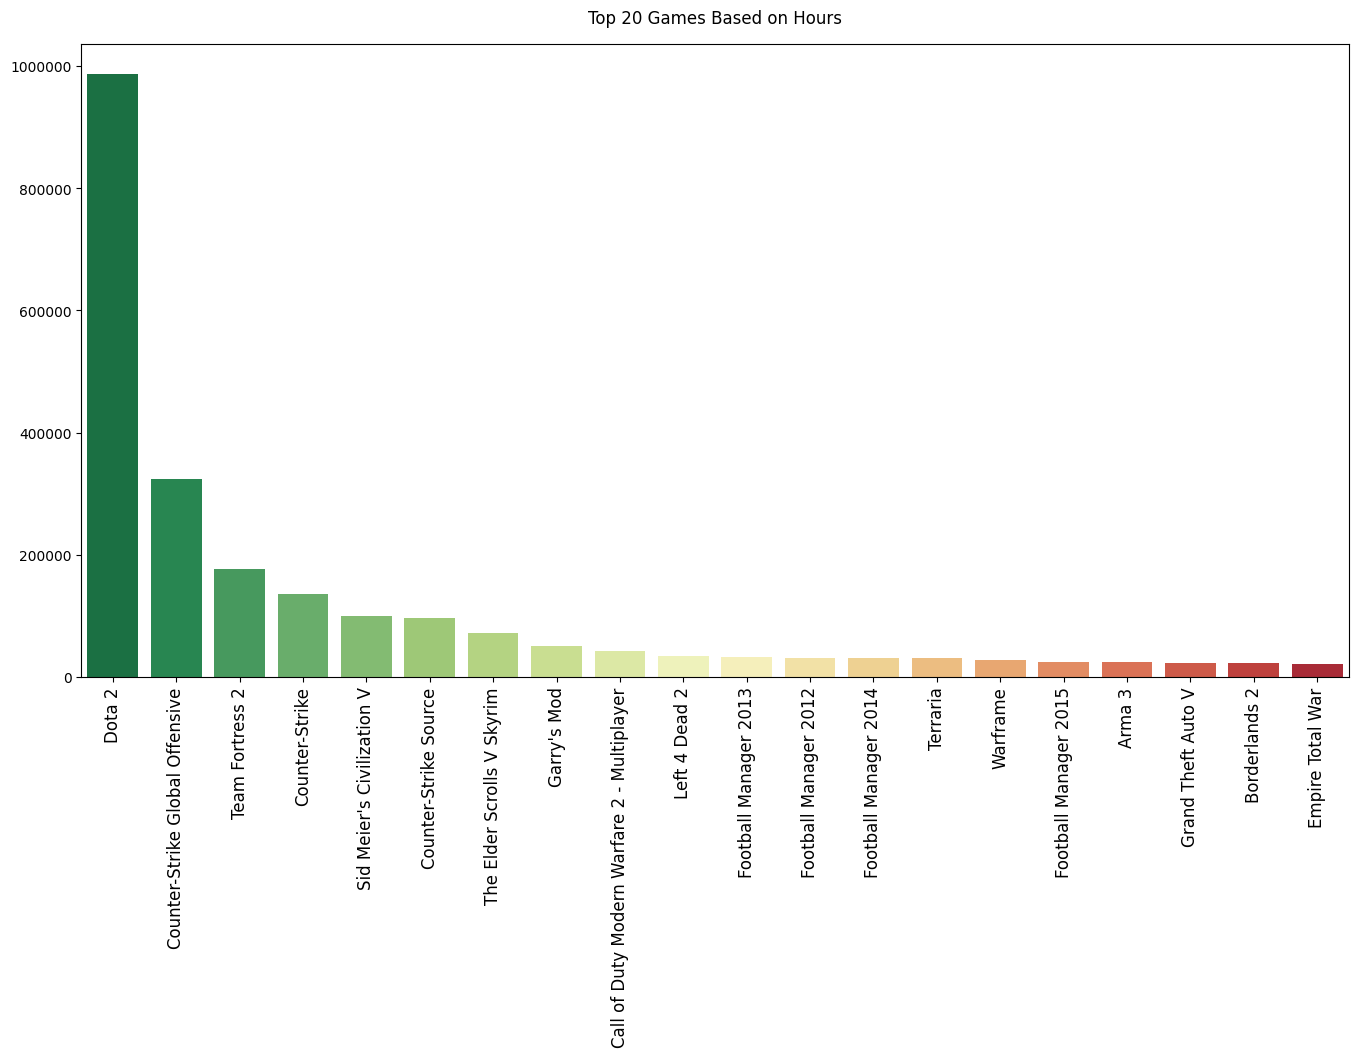

In [8]:
fig1, bar1 = plt.subplots(figsize=(12, 9), sharex=True)
xbar1 = np.array(list(Top20Hour_df["Game Title"]))
ybar1 = np.array(list(Top20Hour_df["Hours"]))

sns.barplot(
    data=Top20Hour_df, x=xbar1, y=ybar1, hue=xbar1, palette="RdYlGn_r", legend=False,
)
bar1.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=90, fontsize= 12)
plt.title("Top 20 Games Based on Hours", y=1.02)
plt.tight_layout(pad=-5)

In [9]:
Top20User_df = (
    df.groupby("Game Title", as_index=False)["User ID"]
    .aggregate("count")
    .sort_values("User ID", ascending=False)[:20]
)

Top20User_df.set_index(pd.Index(list(range(20))), inplace=True)

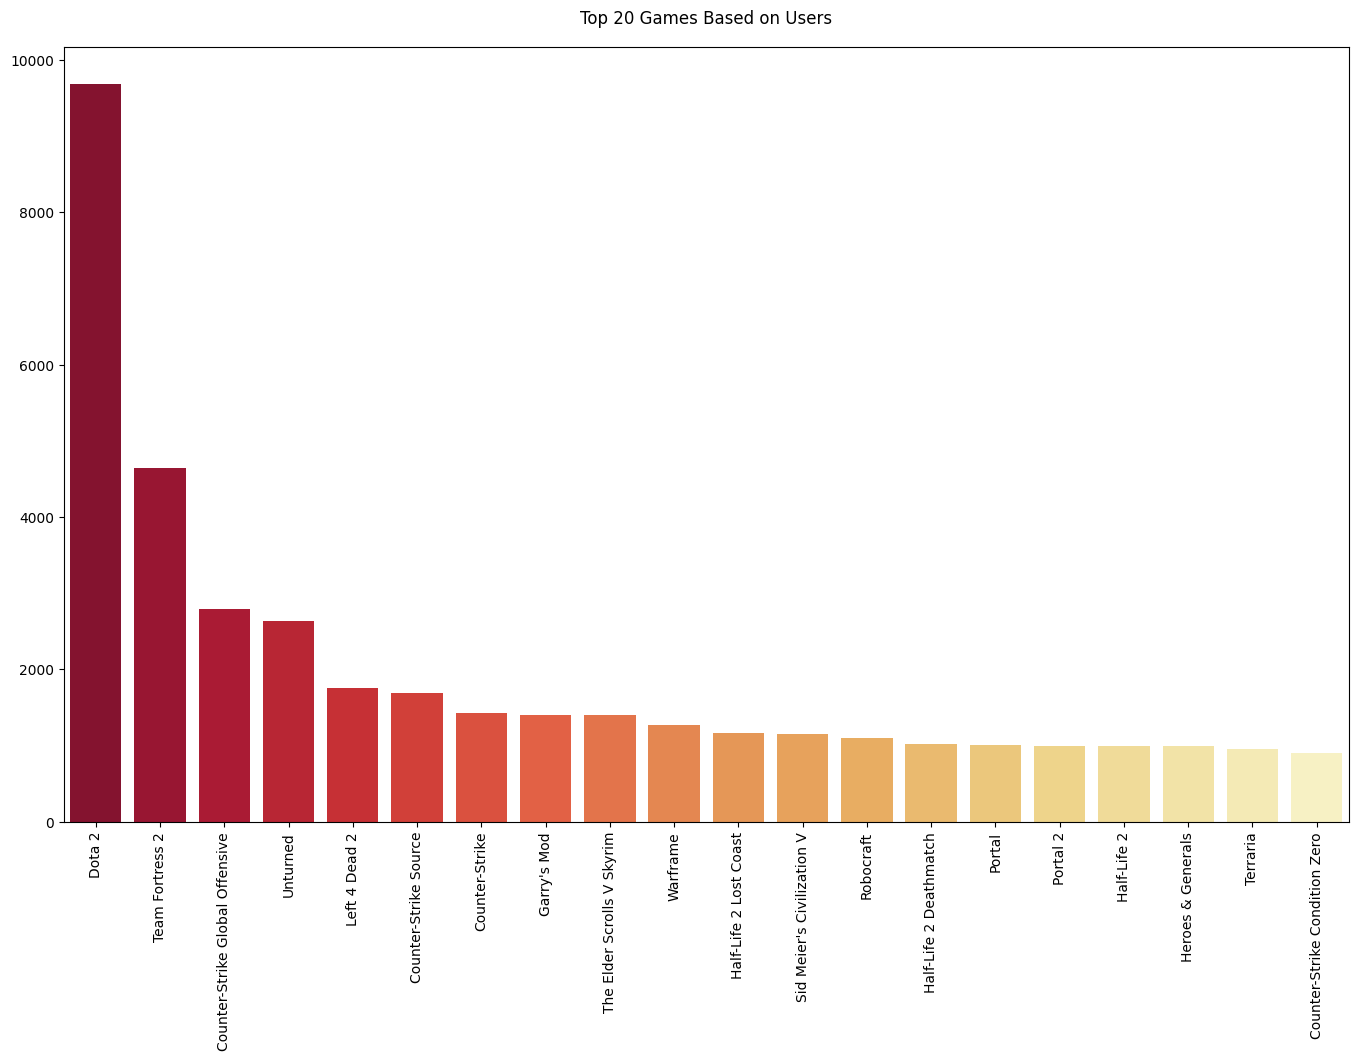

In [10]:
Top20User_df.rename({"User ID": "Users"}, axis="columns", inplace=True)

fig2, bar2 = plt.subplots(figsize=(12, 9), sharex=True)
xbar2 = np.array(list(Top20User_df["Game Title"]))
ybar2 = np.array(list(Top20User_df["Users"]))

sns.barplot(
    data=Top20User_df,
    x=xbar2,
    y=ybar2,
    hue=xbar2,
    palette="YlOrRd_r",
    legend=False,
    ax=bar2,
)
bar2.ticklabel_format(style="plain", axis="y")
plt.title("Top 20 Games Based on Users", y=1.02)
plt.xticks(rotation=90)
plt.tight_layout(pad=-5)

In [11]:
Top20Hour_df["Genre"] = [
    "Strategy",
    "Action",
    "Action",
    "Action",
    "Strategy",
    "Action",
    "Action",
    "Sandbox",
    "Action",
    "Action",
    "Simulation",
    "Simulation",
    "Simulation",
    "Action",
    "Action",
    "Simulation",
    "Action",
    "Action",
    "Action",
    "Strategy",
]

Top20Hour_df["Mode"] = [
    "Multiplayer",
    "Multiplayer",
    "Both",
    "Multiplayer",
    "Both",
    "Multiplayer",
    "Single Player",
    "Single Player",
    "Multiplayer",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
    "Both",
]

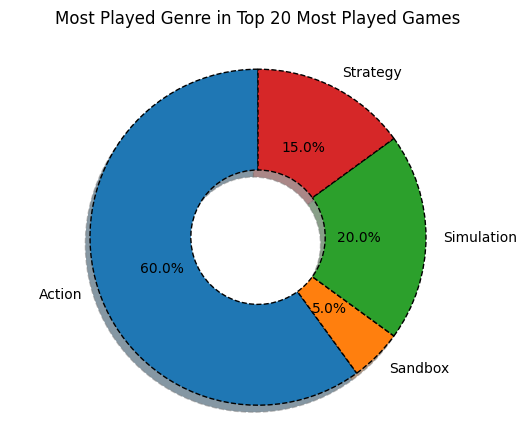

In [12]:
pielabels1 = ["Action", "Sandbox", "Simulation", "Strategy"]
pievalues1 = [
    sum(Top20Hour_df["Genre"] == "Action"),
    sum(Top20Hour_df["Genre"] == "Sandbox"),
    sum(Top20Hour_df["Genre"] == "Simulation"),
    sum(Top20Hour_df["Genre"] == "Strategy"),
]

explode = (0.0, 0, 0, 0)
fig3, pie1 = plt.subplots()

pie1.pie(
    pievalues1,
    explode=explode,
    labels=pielabels1,
    autopct="%1.1f%%",
    shadow={"ox": -0.02, "oy": -0.03, "edgecolor": "gray", "shade": 0.6},
    startangle=90,
    wedgeprops={"width": 0.6, "edgecolor": "black", "linewidth": 1, "linestyle": "--"},
)

pie1.axis("equal")
plt.title("Most Played Genre in Top 20 Most Played Games\n")
plt.show()

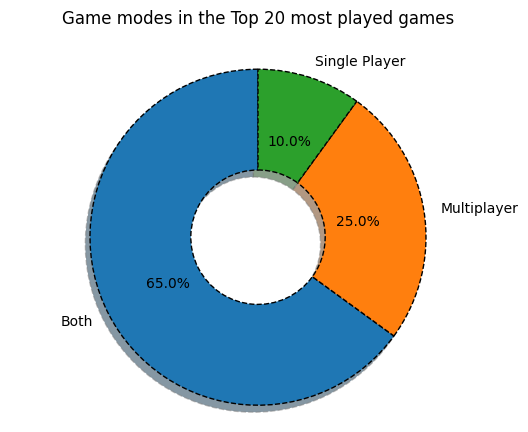

In [13]:
pielabels2 = ["Both", "Multiplayer", "Single Player"]
pievalues2 = [
    sum(Top20Hour_df["Mode"] == "Both"),
    sum(Top20Hour_df["Mode"] == "Multiplayer"),
    sum(Top20Hour_df["Mode"] == "Single Player"),
]
explode = (0.0, 0, 0)
fig4, pie2 = plt.subplots()

pie2.pie(
    pievalues2,
    explode=explode,
    labels=pielabels2,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"width": 0.6, "edgecolor": "black", "linewidth": 1, "linestyle": "--"},
    shadow={"ox": -0.02, "oy": -0.03, "edgecolor": "gray", "shade": 0.6},
)
pie2.axis("equal")
plt.title("Game modes in the Top 20 most played games\n")
plt.show()

In [14]:
app = Dash(__name__)
app.title = "Game Analysis"

app.layout = html.Div(
    [
        html.H1("Game Analysis"),
        dcc.Tabs(
            id="tabs",
            value="tab1",
            children=[
                dcc.Tab(label="Data Table", value="tab1"),
                dcc.Tab(label="Hours", value="tab2"),
                dcc.Tab(label="Users", value="tab3"),
            ],
        ),
        html.Div(id="content"),
    ]
)

In [15]:
@app.callback(Output("content", "children"), Input("tabs", "value"))
def update(tab):
    if tab == "tab1":
        return (
            html.Div(
                children="Games on Steam",
                style={"text-align": "center", "font-size": "30px"},
            ),
            dash_table.DataTable(data=df.to_dict("records"), page_size=5),
            html.Br(),
            html.Br(),
            html.Div(
                children="Top 20 Games Based on Hours",
                style={"text-align": "center", "font-size": "30px"},
            ),
            dash_table.DataTable(data=Top20Hour_df.to_dict("records"), page_size=5),
            html.Br(),
            html.Br(),
            html.Div(
                children="Top 20 Games Based on Users",
                style={"text-align": "center", "font-size": "30px"},
            ),
            dash_table.DataTable(data=Top20User_df.to_dict("records"), page_size=5),
        )

    elif tab == "tab2":
        return (
            dcc.Graph(
                figure=px.histogram(
                    Top20Hour_df,
                    x="Game Title",
                    y="Hours",
                    histfunc="avg",
                    width=1800,
                    height=1000,
                )
                .update_yaxes(title="Top 20 Games Based on Hours")
                .update_xaxes(tickangle=90)
            ),
            html.Br(),
            html.Br(),
            dcc.Graph(
                figure=px.pie(
                    Top20Hour_df,
                    values=pievalues1,
                    labels=pielabels1,
                    names=pielabels1,
                    color=pielabels1,
                    height=450,
                    template="seaborn",
                ).update_layout(title="Most Played Genre in Top 20 Most Played Games")
            ),
            html.Br(),
            html.Br(),
            dcc.Graph(
                figure=px.scatter(
                    Top20Hour_df,
                    x="Hours",
                    y="Game Title",
                )
            ),
        )

    else:
        return (
            dcc.Graph(
                figure=px.histogram(
                    Top20User_df,
                    x="Game Title",
                    y="Users",
                    histfunc="avg",
                    width=1800,
                    height=1000,
                )
                .update_yaxes(title="Top 20 Games Based on Users")
                .update_xaxes(tickangle=90)
            ),
            html.Br(),
            html.Br(),
            dcc.Graph(
                figure=px.pie(
                    Top20Hour_df,
                    values=pievalues2,
                    labels=pielabels2,
                    color=pielabels2,
                    names=pielabels2,
                    height=450,
                    template="seaborn",
                ).update_layout(title="Game modes in the Top 20 most played games")
            ),
        )

In [16]:
if __name__ == "__main__":
    app.run_server(debug=False)

webbrowser.open_new("http://127.0.0.1:8050/")

True